# Investigating Causes of Patient No-Shows


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This dataset contains records from 100,000 medical appointments from various locations in Brazil. It is focused on whether or not patients show up for their appointments, and contains data regarding patient's gender, age, location, and medical conditions, whether the patient has a handicap, whether the patient received medical welfare assistance, whether the patient received a  text message reminder prior to the appointment, when the appointment was scheduled, and the date of the appointment.

This analysis report will look at the impact of certain variables on appointment attendance, including patient gender, age, and location, and patient having received a reminder text message.

In [1]:
# Import statements for all packages used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 'Magic word': plots visualizations inline with notebook
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

The first step in wrangling the data is loading the file. Next, some information about the dataset will be printed.

In [2]:
# Function that takes a csv file as an argument and loads that file into the project
def load_file(csv_file):
    return pd.read_csv(csv_file) 

df = load_file('appointments.csv')

# Print first 10 lines
df.head (10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
5,9.598513e+13,5626772,F,2016-04-27T08:36:51Z,2016-04-29T00:00:00Z,76,REPÚBLICA,0,1,0,0,0,0,No
6,7.336882e+14,5630279,F,2016-04-27T15:05:12Z,2016-04-29T00:00:00Z,23,GOIABEIRAS,0,0,0,0,0,0,Yes
7,3.449833e+12,5630575,F,2016-04-27T15:39:58Z,2016-04-29T00:00:00Z,39,GOIABEIRAS,0,0,0,0,0,0,Yes
8,5.639473e+13,5638447,F,2016-04-29T08:02:16Z,2016-04-29T00:00:00Z,21,ANDORINHAS,0,0,0,0,0,0,No
9,7.812456e+13,5629123,F,2016-04-27T12:48:25Z,2016-04-29T00:00:00Z,19,CONQUISTA,0,0,0,0,0,0,No


In [3]:
# Find number of rows (patient records) 
# Find number of columns (patient/appointment information)
df.shape

(110527, 14)

In [4]:
# Data inpsection: get data types of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
# Display statistical information about the dataset
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


**Explaination**:
The above cells import the data file using pandas, find the total number of rows (patient records) present in the file using *df.shape,* find the data type of each column using *df.info*, and output some general information about the data using *df.describe.*
<br>
<br>
According to the *df.describe* data in the **count** column,there is no missing data in the original file. In addition, have the column's data types is helpful because we need to understand how to handle the data we are working with in code.

### Data Cleaning 

In this section, the data will be cleaned to make it easier to analyze. This cleaning process includes dropping unncessesary columns from the dataset and reformatting column names.

In [6]:
# Drop unnessesary columns
df.drop(['PatientId', 'AppointmentID', 'ScheduledDay', 'AppointmentDay', 'Scholarship', 'Diabetes', 'Alcoholism', 'Handcap', 'Hipertension'], axis=1, inplace=True)
df.head()

,Gender,Age,Neighbourhood,SMS_received,No-show
0,F,62,JARDIM DA PENHA,0,No
1,M,56,JARDIM DA PENHA,0,No
2,F,62,MATA DA PRAIA,0,No
3,F,8,PONTAL DE CAMBURI,0,No
4,F,56,JARDIM DA PENHA,0,No


In [7]:
# Correct 'No-show' column name format
df.rename(columns={'No-show': 'No_show'}, inplace=True)
df.head()

,Gender,Age,Neighbourhood,SMS_received,No_show
0,F,62,JARDIM DA PENHA,0,No
1,M,56,JARDIM DA PENHA,0,No
2,F,62,MATA DA PRAIA,0,No
3,F,8,PONTAL DE CAMBURI,0,No
4,F,56,JARDIM DA PENHA,0,No


<a id='eda'></a>
## Exploratory Data Analysis

Various calculations will be generated to begin the data exploration process.


In [8]:
# Correlation matrix showing relationships between variables
df.corr()

,Age,SMS_received
Age,1.000000,0.012643
SMS_received,0.012643,1.000000


**Explaination:** This chart shows the ways in which age and SMS_received are related to one another. This helps us gain a more robust overview of our data and its categories.

### General info about the data


In [9]:
# Assign names to show and no_show for ease of comparison
noshow = df.No_show == 'Yes'
show = df.No_show == 'No'

In [10]:
# Display count of 'show' patients per category
df[show].count()

Gender           88208
Age              88208
Neighbourhood    88208
SMS_received     88208
No_show          88208
dtype: int64

**Explaination:** There are the same number of shows in each category.

In [11]:
# Display count of 'no show' patients per category
df[noshow].count()

Gender           22319
Age              22319
Neighbourhood    22319
SMS_received     22319
No_show          22319
dtype: int64

**Explaination:** There are the same number of no-shows in each catergorty.

### Data about specific categories

#### Research Question #1: Gender
Does patient gender have an impact on appointment attendance?

Text(0, 0.5, 'Number of patients')

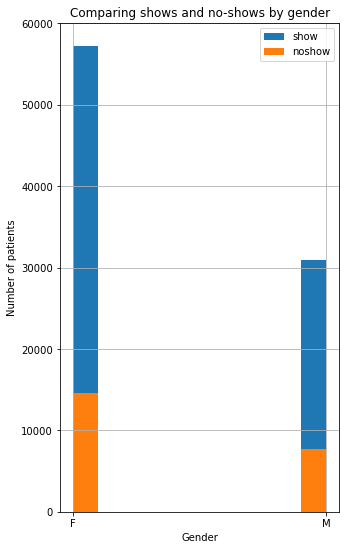

In [12]:
# Chart type 1: histogram
#Comparing shows and no-shows by gender

plt.figure(figsize=[5, 9])
df.Gender[show].hist(label = 'show')
df.Gender[noshow].hist(label = 'noshow')
plt.legend()
plt.title('Comparing shows and no-shows by gender')
plt.xlabel('Gender')
plt.ylabel('Number of patients')

**Explaination:** According to this visualization, both men an women attend and miss appointments at similar rates. We do not have the statistical calculations to find this rate.

#### Research Question #2: Age
Does patient age have in impact impact on appointment attendance?

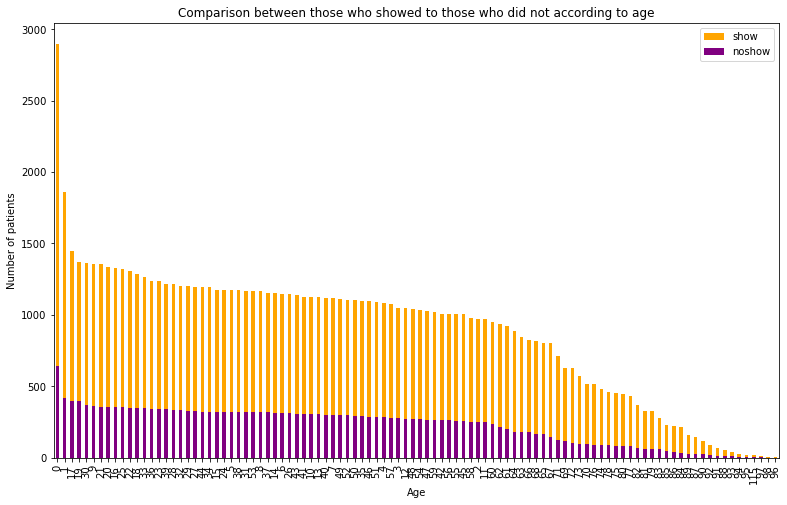

In [13]:
# Chart type 2: bar chart
# Comparing shows and no-shows by age

plt.figure(figsize=[13, 8])
df.Age[show].value_counts().plot (kind = 'bar', color='orange', label = 'show')
df.Age[noshow].value_counts().plot (kind = 'bar', color='purple', label = 'noshow')
plt.legend()
plt.title('Comparison between those who showed to those who did not according to age')
plt.xlabel('Age')
plt.ylabel('Number of patients');

**Explaination:** According to this visualization, we can conclude that patients aged 0-17 attend appointments at a much higher rate than other age groups. Appointment attendence seems to decrease with age, as well. 

#### Research Question #3: Receipt of SMS
Does receiving a reminder text message have an impact on appointment attendance?

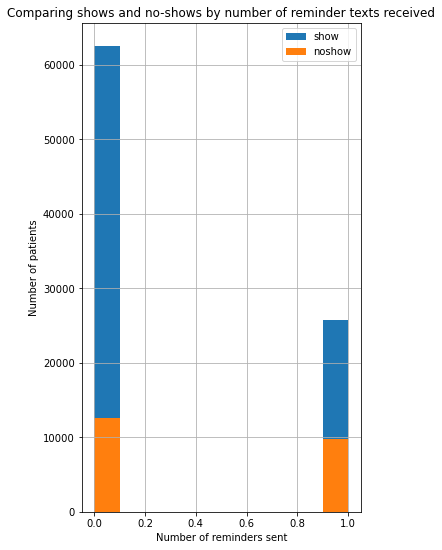

In [14]:
# Comparing shows and no-shows by receipt of reminder text

plt.figure(figsize=[5, 9])
df.SMS_received[show].hist(label = 'show')
df.SMS_received[noshow].hist(label = 'noshow')
plt.legend()
plt.title('Comparing shows and no-shows by number of reminder texts received')
plt.xlabel('Number of reminders sent')
plt.ylabel('Number of patients');

**Explaination:** According to this visualization, we can conclude that, surprisingly, patients who don't receieve a reminder text show up more often. However, we cannot make conclusions about why this is since we do not have enough data. 

<a id='conclusions'></a>
## Conclusions

>**Results:**
<br>
> <ol>
    <li>Research Question #1 (Gender): While women miss more appointments than men, women also attend more appointments than men. Thus, no correlation between gender and appointment no-shows can be inferred. 
    <li>Research Question #2 (Age): Those ages 0-17 are much more likely to show up to an appointment than any other one age group. Likelihood of attending an appointment trends downward with age. 
    <li> Research Question #3 (Receipt of SMS): It appears that patients attend more appointments when they have not received a reminder appointment than when they have. However, futher analysis would need to be conducted to discover whether this is causation or merely correlation.
</ol>

>**Limitations:**
<br>
> <ol>
    <li>This analysis report is limited in scope.
    <li>Statistical analysis was not conducted. Robust statistical testing would allow for better analyisis of data and ability to infer correlation vs. cause.
    <li>The analysis was limited by the scope of the data; more atomic data would be helpful in drawing highly specific conclusions. 